In [20]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

In [21]:
# loading income CSV
income_df = pd.read_csv("household_income_in_minnesota.csv")

In [22]:
# clean the income data
income_cleaned = income_df[~income_df["County"].isin(["United States", "Minnesota"])].copy()
income_cleaned["Value (Dollars)"] = (income_cleaned["Value (Dollars)"].str.replace(",", "").astype(int))

income_cleaned = income_cleaned.sort_values(by="Value (Dollars)", ascending=False)

In [31]:
# income bar chart 
def plot_income(threshold):
    filtered = income_cleaned[income_cleaned["Value (Dollars)"] >= threshold]
    plt.figure(figsize=(10, 6))
    plt.barh(filtered["County"], filtered["Value (Dollars)"], color='paleturquoise')
    plt.xlabel("Median Household Income ($)")
    plt.title(f"Counties in MN with Income ≥ ${threshold:,}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [32]:
# add slider to filter by income 
slider = widgets.IntSlider(
    value=75000,
    min=40000,
    max=125000,
    step=1000,
    description='Income ≥ $',
    continuous_update=False,
)

interact(plot_income, threshold=slider)

interactive(children=(IntSlider(value=75000, continuous_update=False, description='Income ≥ $', max=125000, mi…

<function __main__.plot_income(threshold)>

In [33]:
# loading unemployment CSV
unemploy_df = pd.read_csv("unemployment_in_minnesota.csv")

In [34]:
# clean the unemployment data
unemp_df = pd.read_csv("unemployment_in_minnesota.csv")
unemp_df = unemp_df.rename(columns={
    'Value (Percent)': 'Unemployed(%)',
    'Rank within US (of 3143 counties)': 'Rank(Unemployed)'
})
unemp_df = unemp_df[~unemp_df["County"].isin(["United States", "Minnesota"])]
unemp_df['Unemployed(%)'] = unemp_df['Unemployed(%)'].astype(float)

In [35]:
# merge datasets
income_for_merge = income_cleaned[['County', 'Value (Dollars)']].rename(columns={'Value (Dollars)': 'Income'})
merged_df = pd.merge(income_for_merge, unemp_df[['County', 'Unemployed(%)']], on='County', how='inner')

# sort by income and take top 10
top10_income = merged_df.sort_values(by='Income', ascending=False).head(10)

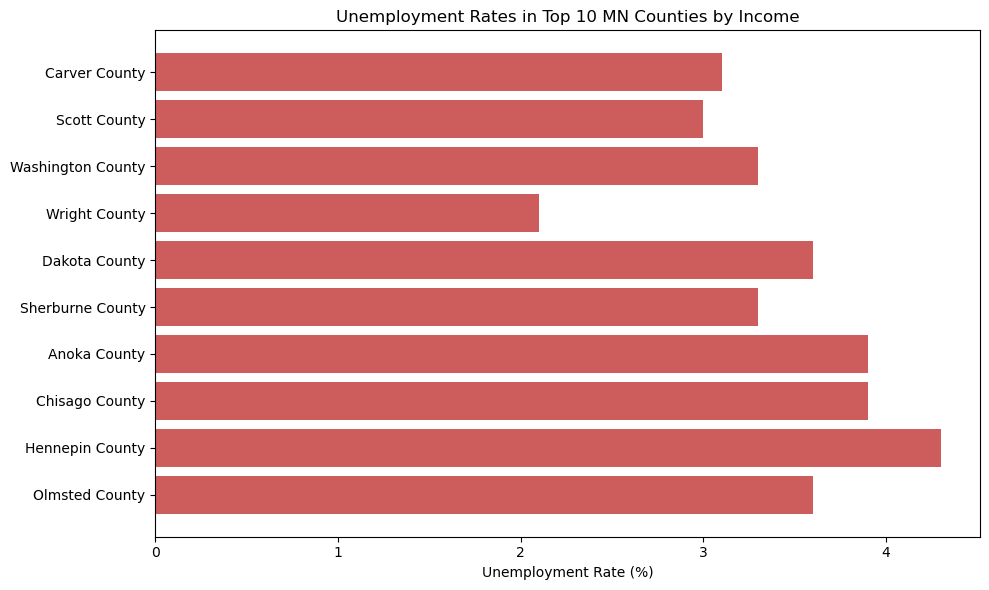

In [36]:
# unemployment bar chart

plt.figure(figsize=(10, 6))
plt.barh(top10_income['County'], top10_income['Unemployed(%)'], color='indianred')
plt.xlabel('Unemployment Rate (%)')
plt.title('Unemployment Rates in Top 10 MN Counties by Income')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()